In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import gridspec
import mds
import xarray as xr
import xmitgcm
import seaborn as sns
import cmocean
import sys
import os
from IPython import display
import time
import xesmf as xe


In [2]:
from scipy.interpolate import griddata
from scipy.interpolate import interp2d


In [3]:
plt.rcParams.update({'font.size': 16
    , 'legend.markerscale': 1., 'axes.titlesize': 16, 'axes.labelsize' : 16,
      'legend.fontsize' : 14,'legend.handlelength': 3})

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'
plt.rcParams.update({'figure.figsize' : (14,6)})


In [8]:
dir_aste='/central/groups/oceanphysics/anirban/ASTE_runs/astedata/'
astemd = xmitgcm.utils.get_extra_metadata(domain='aste', nx=270)
md = xmitgcm.utils.get_extra_metadata(domain='aste', nx=270)
ds_aste = xmitgcm.open_mdsdataset(dir_aste,iters='all',read_grid=True,
                                  geometry='llc', nx=270, extra_metadata=md,
                                  delta_t=1200, ref_date='2002-1-1 0:0:0')

/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/ASTE_runs/astedata/. Using default version.
  "in %s. Using default version." % data_dir)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/ASTE_runs/astedata/. Using default version.
  "in %s. Using default version." % data_dir)
/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/ASTE_runs/astedata/. Using default version.
  "in %s. Using default version." % data_dir)
/central/groups/oceanp

In [11]:
ds_sel = ds_aste.sel(time=slice('2008','2009'))

In [12]:
ds_sel.time

<xarray.DataArray 'time' (time: 24)>
array(['2008-01-01T00:00:00.000000000', '2008-02-01T00:00:00.000000000',
       '2008-03-01T00:00:00.000000000', '2008-04-01T00:00:00.000000000',
       '2008-05-01T00:00:00.000000000', '2008-06-01T00:00:00.000000000',
       '2008-07-01T00:00:00.000000000', '2008-08-01T00:00:00.000000000',
       '2008-09-01T00:00:00.000000000', '2008-10-01T00:00:00.000000000',
       '2008-11-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
       '2009-01-01T00:00:00.000000000', '2009-02-01T00:00:00.000000000',
       '2009-03-01T00:00:00.000000000', '2009-04-01T00:00:00.000000000',
       '2009-05-01T00:00:00.000000000', '2009-06-01T00:00:00.000000000',
       '2009-07-01T00:00:00.000000000', '2009-08-01T00:00:00.000000000',
       '2009-09-01T00:00:00.000000000', '2009-10-01T00:00:00.000000000',
       '2009-11-01T00:00:00.000000000', '2009-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    iter     (time) int64 dask.array<shape=

In [13]:
dir_llc270 = '/central/groups/oceanphysics/anirban/llc270_2008_2009'
ds_llc270 =  xmitgcm.open_mdsdataset(dir_llc270,iters='all',geometry='llc',default_dtype='>f4',
                                    delta_t=1200, ref_date='1992-1-1 0:0:0').chunk({'time': 1})

In [14]:
XCfull = np.zeros((270,540))
XCfull[:,0:270] = np.rot90(ds_llc270.XC.sel(face=10).values)
XCfull[:,270:540] = ds_llc270.XC.sel(face=2).values

YCfull = np.zeros((270,540))
YCfull[:,0:270] = np.rot90(ds_llc270.YC.sel(face=10).values)
YCfull[:,270:540] = ds_llc270.YC.sel(face=2).values

XGfull = np.zeros((270,540))
XGfull[:,0:270] = np.rot90(ds_llc270.XG.sel(face=10).values)
XGfull[:,270:540] = ds_llc270.XG.sel(face=2).values

YGfull = np.zeros((270,540))
YGfull[:,0:270] = np.rot90(ds_llc270.YG.sel(face=10).values)
YGfull[:,270:540] = ds_llc270.YG.sel(face=2).values


In [15]:
idy = (np.where((YGfull[:,-2]>=25.) & (YGfull[:,-2]<44))[0])
YGsmall=YGfull[idy,:]
YCsmall=YCfull[idy,:]
idx = (np.where((XGfull[2,:]>=-82.) & (XGfull[2,:]<-5))[0])
XGsmall=XGfull[:,idx]
XCsmall=XCfull[:,idx]
XC = XCsmall[idy]
YC = YCsmall[:,idx]
XG = XGsmall[idy]
YG = YGsmall[:,idx]
XC.shape, YC.shape, XG.shape, YG.shape

((75, 231), (75, 231), (75, 231), (75, 231))

In [17]:
dirin = '/central/groups/oceanphysics/anirban/grid_uniform/'
dirlist = ['16km']

ds = {}
for v in dirlist:
    
    ds[v] = xmitgcm.open_mdsdataset(dirin+'grid_'+v,iters=None,default_dtype='>f4')


/central/groups/oceanphysics/anirban/miniconda/envs/mypythonenv1/lib/python3.6/site-packages/xmitgcm-0.2.2-py3.6.egg/xmitgcm/mds_store.py:807: UserWarning: Couldn't find available_diagnostics.log in /central/groups/oceanphysics/anirban/grid_uniform/grid_16km. Using default version.
  "in %s. Using default version." % data_dir)


In [18]:
Saltfull = np.zeros((24,50,270,540))
Saltfull[:,:,:,0:270] =  np.rot90(ds_sel.where(ds_sel.hFacC).SALT.sel(face=4).values, 1, (2,3))
Saltfull[:,:,:,270:540] =  ds_sel.where(ds_sel.hFacC).SALT.sel(face=1).values
Salt = Saltfull[:,:,idy][:,:,:,idx]

Thetafull = np.ma.zeros((24,50,270,540))
Thetafull[:,:,:,0:270] =  np.rot90(ds_sel.where(ds_sel.hFacC).THETA.sel(face=4).values, 1, (2,3))
Thetafull[:,:,:,270:540] =  ds_sel.where(ds_sel.hFacC).THETA.sel(face=1).values
Theta = Thetafull[:,:,idy][:,:,:,idx]

Ufull = np.zeros((24,50,270,540))
#Ufull[:,:,0:270] =  np.rot90(ds_sel.where(ds_sel.hFacW).isel(time=0).UVELMASS.sel(face=10).values, 1, (1,2))
Ufull[:,:,:,0:270] =  np.rot90(ds_sel.where(ds_sel.hFacS).VVELMASS.sel(face=4).values, 1, (2,3))
Ufull[:,:,:,270:540] =  ds_sel.where(ds_sel.hFacW).UVELMASS.sel(face=1).values
U = Ufull[:,:,idy][:,:,:,idx]

Vfull = np.zeros((24,50,270,540))
#Vfull[:,:,0:270] =  np.rot90(ds_sel.where(ds_sel.hFacS).isel(time=0).VVELMASS.sel(face=10).values, 1, (1,2))
Vfull[:,:,:,0:270] =  np.rot90(ds_sel.where(ds_sel.hFacW).UVELMASS.sel(face=4).values*-1, 1, (2,3))
Vfull[:,:,:,270:540] =  ds_sel.where(ds_sel.hFacS).VVELMASS.sel(face=1).values
V = Vfull[:,:,idy][:,:,:,idx]

depthfull = np.zeros((270,540))
depthfull[:,0:270] = np.rot90(ds_sel.Depth.sel(face=4).values)
depthfull[:,270:540] = ds_sel.Depth.sel(face=1).values
depth = depthfull[idy,:][:,idx]

hFacCfull = np.zeros((50,270,540))
hFacCfull[:,:,0:270] =  np.rot90(ds_sel.hFacC.sel(face=4).values, 1, (1,2))
hFacCfull[:,:,270:540] =  ds_sel.hFacC.sel(face=1).values
hFacC = hFacCfull[:,idy][:,:,idx]

hFacSfull = np.zeros((50,270,540))
hFacSfull[:,:,0:270] =  np.rot90(ds_sel.hFacS.sel(face=4).values, 1, (1,2))
hFacSfull[:,:,270:540] =  ds_sel.hFacS.sel(face=1).values
hFacS = hFacSfull[:,idy][:,:,idx]

hFacWfull = np.zeros((50,270,540))
hFacWfull[:,:,0:270] =  np.rot90(ds_sel.hFacW.sel(face=4).values, 1, (1,2))
hFacWfull[:,:,270:540] =  ds_sel.hFacW.sel(face=1).values
hFacW = hFacWfull[:,idy][:,:,idx]

dxcfull = np.zeros((270,540))
dxcfull[:,0:270] = np.rot90(ds_llc270.dyC.sel(face=10).values)
dxcfull[:,270:540] = ds_llc270.dxC.sel(face=2).values
dxc = dxcfull[idy,:][:,idx]

dxgfull = np.zeros((270,540))
dxgfull[:,0:270] = np.rot90(ds_llc270.dyG.sel(face=10).values)
dxgfull[:,270:540] = ds_llc270.dxG.sel(face=2).values
dxg = dxgfull[idy,:][:,idx]

dycfull = np.zeros((270,540))
dycfull[:,0:270] = np.rot90(ds_llc270.dxC.sel(face=10).values)
dycfull[:,270:540] = ds_llc270.dyC.sel(face=2).values
dyc = dycfull[idy,:][:,idx]

dygfull = np.zeros((270,540))
dygfull[:,0:270] = np.rot90(ds_llc270.dxG.sel(face=10).values)
dygfull[:,270:540] = ds_llc270.dyG.sel(face=2).values
dyg = dygfull[idy,:][:,idx]

xc = XC[10]
yc = YC[:,10]

xg = XG[10]
yg = YG[:,10]


z = ds_llc270.Z.values


In [19]:
grid_f = {}

for i,res in enumerate(dirlist):
    

    grid_f['xc'+res] = ds[res].XC.values
    grid_f['yc'+res] = ds[res].YC.values
    grid_f['xg'+res] = ds[res].XG.values
    grid_f['yg'+res] = ds[res].YG.values

    grid_f['z'+res] = ds[res].Z.values

In [20]:
def fill_land(dataarray, x,y):
    xx,yy = np.meshgrid(x,y)
    assert xx.shape == dataarray.shape
    assert yy.shape == dataarray.shape
    data = dataarray.ravel()[~np.isnan(dataarray.ravel())]
    xpts = xx.ravel()[~np.isnan(dataarray.ravel())]
    ypts = yy.ravel()[~np.isnan(dataarray.ravel())]
    
    
    data_filled = griddata((xpts, ypts), data, (xx,yy), method='nearest',rescale=True)
    return data_filled

In [21]:
%%time
coarse = {}
xlist={}
ylist={}
xlist_f={}
ylist_f={}


coarse['s'] = Salt[:12]
coarse['s'][:6] = Salt[12:18]
coarse['t'] = Theta[:12]
coarse['t'][:6] = Theta[12:18]
coarse['u'] = U[:12]
coarse['u'][:6] = U[12:18]
coarse['v'] = V[:12]
coarse['v'][:6] = V[12:18]
xlist={}
ylist={}

xlist['s']=xc
xlist['t']=xc
xlist['v']=xc
xlist['u']=xg
ylist['s']=yc
ylist['t']=yc
ylist['v']=yg
ylist['u']=yc

for res in dirlist:
    
    ylist_f['s'+res]=ds[res].YC.values
    ylist_f['t'+res]=ds[res].YC.values
    ylist_f['v'+res]=ds[res].YG.values
    ylist_f['u'+res]=ds[res].YC.values

    xlist_f['s'+res]=ds[res].XC.values
    xlist_f['t'+res]=ds[res].XC.values
    xlist_f['v'+res]=ds[res].XC.values
    xlist_f['u'+res]=ds[res].XG.values



wet = {}
for v in coarse.keys():
    wet[v]=np.zeros_like(coarse[v])
for v in coarse.keys():
    for i in range(coarse[v].shape[0]):
        for j in range(coarse[v].shape[1]):
            wet[v][i,j] = fill_land(coarse[v][i,j],xlist[v],ylist[v])

CPU times: user 46.1 s, sys: 81.4 ms, total: 46.2 s
Wall time: 46.3 s


In [22]:
def interp_c2f(data, xc, yc, xf, yf):
    f = interp2d(xc,yc,data, kind='linear')
    data_fine = f(xf,yf)
    return data_fine

In [27]:
noland = {}
for res in dirlist:
    for v in wet.keys():
        noland[v+res] = np.zeros((wet[v].shape[0],wet[v].shape[1],ds[res].Depth.shape[0],ds[res].Depth.shape[1]))

In [30]:
noland['s16km'].shape

(12, 50, 100, 370)

In [31]:
for res in dirlist:
    for v in wet.keys():
        for i in range(wet[v].shape[0]):
            for j in range(wet[v].shape[1]):
                noland[v+res][i,j] = interp_c2f(wet[v][i,j],xlist[v],ylist[v],xlist_f[v+res],ylist_f[v+res]) 

In [32]:
var0 = {}
for v in noland.keys():
    if(v == 'v'):
        var0['OBS'+v] = noland[v][:,:,1]
    else:
        var0['OBS'+v] = noland[v][:,:,0]
    var0['OBN'+v] = noland[v][:,:,-1]
    var0['OBE'+v] = noland[v][:,:,:,-1]
    

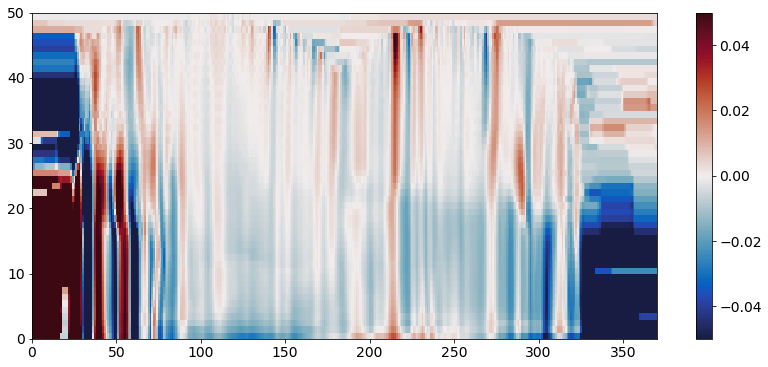

In [33]:
plt.pcolormesh(var0['OBSv16km'][3], cmap=cmocean.cm.balance, vmin=-0.05, vmax=0.05);plt.colorbar()

In [34]:
var = {}
for v in var0.keys():
    var[v] = np.zeros((var0[v].shape[0],100,var0[v].shape[2]))

In [35]:
for res in dirlist:
    for v in wet.keys():
        for it in range(len(var0['OBS'+v+res])):
            var['OBS'+v+res][it] = np.flipud(interp_c2f(var0['OBS'+v+res][it],
                                                        xlist_f[v+res],z, 
                                                        xlist_f[v+res], grid_f['z'+res]))
            var['OBN'+v+res][it] = np.flipud(interp_c2f(var0['OBN'+v+res][it],
                                                        xlist_f[v+res],z, 
                                                        xlist_f[v+res], grid_f['z'+res]))
            var['OBE'+v+res][it] = np.flipud(interp_c2f(var0['OBE'+v+res][it],
                                                        ylist_f[v+res],z, 
                                                        ylist_f[v+res], grid_f['z'+res]))
            

In [36]:
hfacs = ['hFacC', 'hFacS', 'hFacW']
for res in dirlist:
    for hf in hfacs:
        grid_f[hf+res]= ds[res][hf].values


In [37]:
msk = {}
for res in dirlist:
    
    msk['OBSs'+res] = ds[res]['hFacC'][:,0].values
    msk['OBNs'+res] = ds[res]['hFacC'][:,-1].values
    msk['OBSt'+res] = ds[res]['hFacC'][:,0].values
    msk['OBNt'+res] = ds[res]['hFacC'][:,-1].values
    msk['OBSu'+res] = ds[res]['hFacW'][:,0].values
    msk['OBNu'+res] = ds[res]['hFacW'][:,-1].values
    msk['OBSv'+res] = ds[res]['hFacS'][:,1].values
    msk['OBNv'+res] = ds[res]['hFacS'][:,-1].values
    msk['OBEs'+res] = ds[res]['hFacC'][:,:,-1].values
    msk['OBEt'+res] = ds[res]['hFacC'][:,:,-1].values
    msk['OBEu'+res] = ds[res]['hFacW'][:,:,-1].values
    msk['OBEv'+res] = ds[res]['hFacS'][:,:,-1].values

In [40]:
wet.keys()

dict_keys(['s', 't', 'u', 'v'])

In [46]:
var1 = var.copy()
for v in var.keys():
    for i in range(len(var[v])):
        var1[v][i] = np.where(msk[v]>0, var[v][i], 0)


In [41]:
varin0 = {}
for v in wet.keys():
    for res in dirlist:
        varin0[v+'0'+res]=noland[v+res][0]

In [42]:
varin = {}
for v in varin0.keys():
    varin[v] = np.zeros((100, varin0[v].shape[1],varin0[v].shape[2]))
    print(varin0[v].shape, varin[v].shape)

(50, 100, 370) (100, 100, 370)
(50, 100, 370) (100, 100, 370)
(50, 100, 370) (100, 100, 370)
(50, 100, 370) (100, 100, 370)


In [43]:
for v in wet.keys():
    for res in dirlist:
        for it in range(varin0[v+'0'+res].shape[1]):
            varin[v+'0'+res][:,it] = np.flipud(interp_c2f(varin0[v+'0'+res][:,it], 
                                                  xlist_f[v+res], z, 
                                                  xlist_f[v+res], grid_f['z'+res]))

In [44]:
def output_binary_file(data, fname, dtype=np.dtype('>f4')):
    data.astype(dtype).tofile(fname)

In [48]:
bcdir_root = '/central/groups/oceanphysics/anirban/BC_IC_uniform/'
obslist = ['OBS', 'OBN', 'OBE']
for v in wet.keys():
    for res in dirlist:
        for ob in obslist:
            
        
            bcdir = bcdir_root+'BC_IC_'+res+'/' 
            output_binary_file(var1[ob+v+res], 
                           os.path.join(bcdir, 
                                        ob+v+'_%sx%sx%s.bin' %(var1[ob+v+res].shape[-1],
                                                                  var1[ob+v+res].shape[-2],
                                                                  var1[ob+v+res].shape[0])))

In [49]:
for v in wet.keys():
    for res in dirlist:
        bcdir = bcdir_root+'BC_IC_'+res+'/' 
        output_binary_file(varin[v+'0'+res], 
                           os.path.join(bcdir, 
                                        v+'0'+'_%sx%sx%s.bin' %(varin[v+'0'+res].shape[-1],
                                                                varin[v+'0'+res].shape[-2],
                                                                varin[v+'0'+res].shape[0])))